In [299]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import cmath #for complex numbers
from scipy.linalg import eig

from scipy.spatial import distance_matrix

# Staring in given state

In [300]:
dipole_vector_hat = np.array([0, 1, 0]) #i y retning 

In [301]:
points = np.array([
    # [-8, 0, 0],
    # [-7, 0, 0],
    # [-6, 0, 0],
   #   [-5, 0, 0],
   #   [-4, 0, 0],
   #  [-3, 0, 0],
   [-2, 0, 0],
    [-1, 0, 0],
    [0, 0, 0],
    [1, 0, 0],
   [2, 0, 0],
   # [3, 0, 0],
   #  [4, 0, 0],
   #   [5, 0, 0],
    # [6, 0, 0],
    # [7, 0, 0],
    # [8, 0, 0]
])

#distance_matrix = distance_matrix(points, points) eventuelt for hurtigere 
r_ij_vector = points[:, np.newaxis] - points
r_ij = np.linalg.norm(r_ij_vector, axis=2, keepdims=True)
r_ij_hat = np.divide(r_ij_vector, r_ij, out=np.zeros_like(r_ij_vector, dtype=float), where=(r_ij != 0)) 

k_e__r_ij_vector = 0.2 * np.pi * r_ij_vector 
k_e__r_ij = np.linalg.norm(k_e__r_ij_vector, axis=2, keepdims=True)

F = np.zeros(shape = (len(k_e__r_ij), len(k_e__r_ij)), dtype=complex)

for l in range(len(k_e__r_ij)): 
   dot_product = np.dot(r_ij_hat[l, :, :] , dipole_vector_hat)

   denom1 = (k_e__r_ij[l].flatten())
   denom2 = (k_e__r_ij[l].flatten())**2
   denom3 = (k_e__r_ij[l].flatten())**3
   safe_denom1 = np.where(denom1 == 0, np.nan, denom1)
   safe_denom2 = np.where(denom2 == 0, np.nan, denom2)
   safe_denom3 = np.where(denom3 == 0, np.nan, denom3)

   f_ji =  3/2 * (1 - (dot_product)**2) * np.sin(k_e__r_ij[l].flatten())/safe_denom1 \
      + 3/2 * (1 - 3 * (dot_product)**2) * (np.cos(k_e__r_ij[l].flatten())/safe_denom2 - np.sin(k_e__r_ij[l].flatten())/ safe_denom3) 
   g_ji = -3/2 * (1 - (dot_product)**2) * np.cos(k_e__r_ij[l].flatten())/safe_denom1 \
      + 3/2 * (1 - 3 * (dot_product)**2) * (np.sin(k_e__r_ij[l].flatten())/safe_denom2 + np.cos(k_e__r_ij[l].flatten())/ safe_denom3) 
   
   f_ji = np.nan_to_num(f_ji)
   g_ji = np.nan_to_num(g_ji)

   #Fill F
   F[:, l] = f_ji + 1j * g_ji 

I = np.eye(len(k_e__r_ij), dtype = complex)

A = - 1/2 * (I + F)
print(A)
print(A.conj().T)

A_eigenvalues, A_left_eigvecs, A_right_eigvecs = eig(A, left=True, right=True)

# for eigenvalue in A_eigenvalues:
#    print(eigenvalue)

[[-0.5       +0.j         -0.46134842-2.59709387j -0.35493593-0.384059j
  -0.20668068-0.28910337j -0.05157598-0.27299359j]
 [-0.46134842-2.59709387j -0.5       +0.j         -0.46134842-2.59709387j
  -0.35493593-0.384059j   -0.20668068-0.28910337j]
 [-0.35493593-0.384059j   -0.46134842-2.59709387j -0.5       +0.j
  -0.46134842-2.59709387j -0.35493593-0.384059j  ]
 [-0.20668068-0.28910337j -0.35493593-0.384059j   -0.46134842-2.59709387j
  -0.5       +0.j         -0.46134842-2.59709387j]
 [-0.05157598-0.27299359j -0.20668068-0.28910337j -0.35493593-0.384059j
  -0.46134842-2.59709387j -0.5       +0.j        ]]
[[-0.5       -0.j         -0.46134842+2.59709387j -0.35493593+0.384059j
  -0.20668068+0.28910337j -0.05157598+0.27299359j]
 [-0.46134842+2.59709387j -0.5       -0.j         -0.46134842+2.59709387j
  -0.35493593+0.384059j   -0.20668068+0.28910337j]
 [-0.35493593+0.384059j   -0.46134842+2.59709387j -0.5       -0.j
  -0.46134842+2.59709387j -0.35493593+0.384059j  ]
 [-0.20668068+0.28910

In [302]:
norm_matrix = np.round(A_left_eigvecs.T @ A_right_eigvecs, 4)
norms = np.diagonal(norm_matrix.real)
norms = np.array(norms, dtype=np.complex128)
test_identity = np.diag(norms @ norm_matrix)
norm_matrix #see some of the diagonal elements are -1

array([[ 1.0e+00-0.j    , -0.0e+00+0.j    ,  1.4e-03-0.0419j,
        -3.0e-04+0.0092j,  0.0e+00-0.j    ],
       [ 0.0e+00-0.j    , -1.0e+00-0.j    ,  0.0e+00+0.j    ,
        -0.0e+00-0.j    ,  0.0e+00+0.0622j],
       [ 1.4e-03+0.0419j, -0.0e+00+0.j    ,  1.0e+00+0.j    ,
        -3.0e-04-0.0048j, -0.0e+00-0.j    ],
       [-3.0e-04-0.0092j,  0.0e+00+0.j    , -3.0e-04+0.0048j,
         1.0e+00-0.j    , -0.0e+00-0.j    ],
       [ 0.0e+00+0.j    , -0.0e+00+0.0622j,  0.0e+00+0.j    ,
        -0.0e+00-0.j    ,  1.0e+00-0.j    ]])

## OBS skal det her skrives om, så det som udgangspunkt tager kvadratroden for at normalisere korrekt. Lige nu virker det kun, hvis normerne er hhv. 1 og -1

In [303]:
print('Before:', norms)
for i, norm in enumerate(norms):
    if norm == -1: 
        norms[i] = 1j

print('After:', norms)

Before: [ 1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j]
After: [1.+0.j 0.+1.j 1.+0.j 1.+0.j 1.+0.j]


In [304]:
normalized_A_left_eigvecs = A_left_eigvecs / norms
normalized_A_right_eigvecs = A_right_eigvecs / norms

In [305]:
tester = np.round(normalized_A_left_eigvecs.T @ normalized_A_right_eigvecs, 5) 
tester

array([[ 1.000e+00-0.j     ,  0.000e+00+0.j     ,  1.450e-03-0.04189j,
        -2.600e-04+0.0092j ,  0.000e+00-0.j     ],
       [-0.000e+00-0.j     ,  1.000e+00+0.j     ,  0.000e+00-0.j     ,
        -0.000e+00+0.j     ,  6.225e-02-0.j     ],
       [ 1.450e-03+0.04189j,  0.000e+00+0.j     ,  1.000e+00+0.j     ,
        -2.800e-04-0.00484j, -0.000e+00-0.j     ],
       [-2.600e-04-0.0092j ,  0.000e+00-0.j     , -2.800e-04+0.00484j,
         1.000e+00-0.j     , -0.000e+00-0.j     ],
       [ 0.000e+00+0.j     ,  6.225e-02+0.j     ,  0.000e+00+0.j     ,
        -0.000e+00-0.j     ,  1.000e+00-0.j     ]])

In [306]:
is_identity = np.array_equal(tester, np.eye(A.shape[0]))
print(is_identity)

False


### Changing the basis

In [307]:
initial_state_ibase = np.array([1, 0, 0, 0, 0]) #NORMALIZE so theres only one exitation. Also make sure #components matches the basis of the system ie. number of atoms.

In [308]:
b = normalized_A_left_eigvecs.T @ normalized_A_right_eigvecs
b

array([[ 1.00000000e+00-1.75771721e-16j,  7.68085792e-17+6.75550312e-17j,
         1.44722926e-03-4.18878224e-02j, -2.59781341e-04+9.20205252e-03j,
         1.79587100e-16-1.24829132e-16j],
       [-3.18170329e-16-9.56120873e-17j,  1.00000000e+00+6.64001482e-16j,
         6.52865636e-16-3.92054499e-16j, -2.11303654e-16+1.47623462e-16j,
         6.22461576e-02-2.84718180e-16j],
       [ 1.44722926e-03+4.18878224e-02j,  3.01066853e-16+4.07456919e-16j,
         1.00000000e+00+1.00844407e-16j, -2.79421829e-04-4.83526116e-03j,
        -6.28371314e-17-2.49580499e-17j],
       [-2.59781341e-04-9.20205252e-03j,  2.66212081e-16-1.82934493e-16j,
        -2.79421829e-04+4.83526116e-03j,  1.00000000e+00-4.53347933e-16j,
        -3.07892750e-16-6.17574304e-16j],
       [ 7.37739872e-17+1.56836241e-16j,  6.22461576e-02+3.44854229e-16j,
         8.30063564e-17+9.27039291e-17j, -2.76930371e-16-5.69760704e-16j,
         1.00000000e+00-7.31996674e-16j]])

In [309]:
# initial_state_eigbase = normalized_A_left_eigvecs.T @ initial_state_ibase
# initial_state_eigbase

In [310]:
b = normalized_A_left_eigvecs.T @ normalized_A_right_eigvecs[:, 0]
b

array([ 1.00000000e+00-1.75621096e-16j, -3.16435606e-16-1.23367663e-16j,
        1.44722926e-03+4.18878224e-02j, -2.59781341e-04-9.20205252e-03j,
        1.01529563e-16+1.55749682e-16j])

In [311]:
A_left_eigvecs[:, 0]

array([0.33551954+0.01930208j, 0.49182097+0.00605108j,
       0.53875707+0.j        , 0.49182097+0.00605108j,
       0.33551954+0.01930208j])

In [312]:
A_right_eigvecs[:, 0]

array([0.33551954-0.01930208j, 0.49182097-0.00605108j,
       0.53875707+0.j        , 0.49182097-0.00605108j,
       0.33551954-0.01930208j])

In [313]:
np.dot(A_left_eigvecs[:, 0], A_right_eigvecs[:, 0])

(0.9999999999999998-1.7663908292398356e-16j)

In [314]:
np.round(A_left_eigvecs.conj() @ A_right_eigvecs, 4)

array([[-4.661e-01-0.0194j,  3.390e-02-0.0195j, -2.655e-01+0.0234j,
        -2.482e-01-0.025j , -8.046e-01-0.0321j],
       [-1.314e-01-0.0347j,  2.000e-04-0.0192j, -5.737e-01-0.0091j,
         8.081e-01+0.0054j,  1.510e-02-0.0136j],
       [ 7.952e-01-0.0139j, -1.020e-02-0.0177j,  1.019e-01-0.0145j,
         2.116e-01+0.0031j, -5.579e-01-0.0165j],
       [ 1.150e-02+0.0091j,  9.965e-01+0.0411j,  3.580e-02-0.0014j,
         2.870e-02-0.0251j,  1.510e-02-0.0136j],
       [ 3.641e-01-0.024j ,  3.390e-02-0.0195j, -7.661e-01-0.0368j,
        -4.892e-01-0.0026j,  1.917e-01+0.0281j]])

In [315]:
np.round(A_left_eigvecs.conj().T @ A_right_eigvecs, 4)

array([[ 0.9984-0.0378j, -0.    -0.j    ,  0.    -0.j    ,
        -0.    -0.j    ,  0.    +0.j    ],
       [ 0.    -0.j    , -0.9962-0.0602j,  0.    +0.j    ,
        -0.    -0.j    ,  0.    +0.j    ],
       [-0.    +0.j    , -0.    +0.j    ,  0.9986+0.0322j,
        -0.    +0.j    , -0.    -0.j    ],
       [ 0.    +0.j    ,  0.    -0.j    ,  0.    -0.j    ,
         0.9999-0.0034j, -0.    +0.j    ],
       [ 0.    -0.j    , -0.    +0.j    ,  0.    +0.j    ,
        -0.    -0.j    ,  0.9962+0.0602j]])

In [316]:
norm_factors = np.einsum('ij,ij->j', A_left_eigvecs.conj(), A_right_eigvecs)
A_left_eigvecs = A_left_eigvecs / np.sqrt(norm_factors)[None, :]  # Broadcast division column-wise
A_right_eigvecs = A_right_eigvecs / np.sqrt(norm_factors)[None, :]

In [317]:
np.round(A_left_eigvecs.conj().T @ A_right_eigvecs, 4)

array([[ 0.9993-0.0378j,  0.    -0.j    ,  0.    -0.j    ,
        -0.    -0.j    ,  0.    +0.j    ],
       [-0.    -0.j    , -0.9982-0.0603j,  0.    -0.j    ,
        -0.    +0.j    ,  0.    -0.j    ],
       [-0.    +0.j    , -0.    -0.j    ,  0.9995+0.0323j,
        -0.    +0.j    , -0.    -0.j    ],
       [ 0.    +0.j    ,  0.    +0.j    , -0.    -0.j    ,
         1.    -0.0034j, -0.    +0.j    ],
       [ 0.    -0.j    , -0.    -0.j    ,  0.    +0.j    ,
        -0.    -0.j    ,  0.9982+0.0603j]])

In [318]:
#Check if left are normalized
print(np.linalg.norm(A_left_eigvecs, axis=0))

[1.00046085 1.000971   1.00044552 1.00002705 1.000971  ]


In [319]:
identity_check = A_left_eigvecs.conj().T @ A_right_eigvecs

In [320]:
np.round(A_left_eigvecs.conj().T @ A_right_eigvecs, 4)

array([[ 0.9993-0.0378j,  0.    -0.j    ,  0.    -0.j    ,
        -0.    -0.j    ,  0.    +0.j    ],
       [-0.    -0.j    , -0.9982-0.0603j,  0.    -0.j    ,
        -0.    +0.j    ,  0.    -0.j    ],
       [-0.    +0.j    , -0.    -0.j    ,  0.9995+0.0323j,
        -0.    +0.j    , -0.    -0.j    ],
       [ 0.    +0.j    ,  0.    +0.j    , -0.    -0.j    ,
         1.    -0.0034j, -0.    +0.j    ],
       [ 0.    -0.j    , -0.    -0.j    ,  0.    +0.j    ,
        -0.    -0.j    ,  0.9982+0.0603j]])

In [321]:
np.round(A_left_eigvecs.T @ A_right_eigvecs, 4)

array([[ 1.0002e+00+0.0379j, -0.0000e+00-0.j    ,  1.6000e-03-0.0419j,
        -4.0000e-04+0.0092j,  0.0000e+00-0.j    ],
       [ 0.0000e+00+0.j    ,  1.0001e+00-0.0605j, -0.0000e+00+0.j    ,
         0.0000e+00-0.j    , -6.2300e-02+0.0038j],
       [ 1.3000e-03+0.0419j, -0.0000e+00-0.j    ,  1.0004e+00-0.0323j,
        -3.0000e-04-0.0048j, -0.0000e+00-0.j    ],
       [-1.0000e-04-0.0092j, -0.0000e+00+0.j    , -2.0000e-04+0.0048j,
         1.0000e+00+0.0035j, -0.0000e+00-0.j    ],
       [ 0.0000e+00+0.j    , -6.2300e-02+0.0038j,  0.0000e+00+0.j    ,
        -0.0000e+00-0.j    ,  1.0001e+00-0.0605j]])

In [322]:
np.round(A_right_eigvecs.conj().T @ A_right_eigvecs, 4)

array([[ 1.0009e+00-0.j    ,  0.0000e+00+0.j    , -0.0000e+00-0.042j ,
        -1.0000e-04+0.0092j,  0.0000e+00+0.j    ],
       [ 0.0000e+00-0.j    ,  1.0019e+00-0.j    , -0.0000e+00+0.j    ,
         0.0000e+00-0.j    , -6.2400e-02+0.j    ],
       [-0.0000e+00+0.042j , -0.0000e+00-0.j    ,  1.0009e+00-0.j    ,
        -2.0000e-04-0.0048j,  0.0000e+00-0.j    ],
       [-1.0000e-04-0.0092j,  0.0000e+00+0.j    , -2.0000e-04+0.0048j,
         1.0001e+00+0.j    , -0.0000e+00+0.j    ],
       [ 0.0000e+00-0.j    , -6.2400e-02-0.j    ,  0.0000e+00+0.j    ,
        -0.0000e+00-0.j    ,  1.0019e+00+0.j    ]])

Check for $< \lambda_i^L | \lambda_j^R > = \delta_{ij}$. vdot used so it actually complex conjugates. 

In [323]:
np.vdot(A_left_eigvecs[:, 0], A_right_eigvecs[:, 0])

(0.9992836615128761-0.03784394051126461j)

In [324]:
A_left_eigvecs[:, 2]

array([-0.55642004+0.02434382j,  0.04472752+0.01010266j,
        0.61334836-0.00990098j,  0.04472752+0.01010266j,
       -0.55642004+0.02434382j])

In [325]:
A_right_eigvecs[:, 2]

array([-0.55691587-0.00637178j,  0.04437814-0.01154105j,
        0.61334836-0.00990098j,  0.04437814-0.01154105j,
       -0.55691587-0.00637178j])

In [326]:
np.vdot(A_left_eigvecs[:, 0], A_right_eigvecs[:, 0])

(0.9992836615128761-0.03784394051126461j)

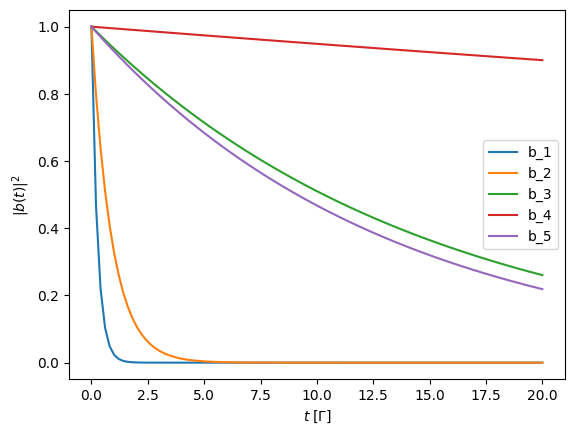

In [327]:
t = np.linspace(0,20, 100)
bt = np.zeros(shape = (len(k_e__r_ij), len(t)), dtype=complex)

for i in range(len(A_eigenvalues)):
    bt[i] = np.exp((A_eigenvalues[i] + np.conjugate(A_eigenvalues[i])) * t) 

    plt.plot(t, bt[i].real, label=f"b_{i+1}") 

plt.legend()
plt.xlabel(r"$t \; [\Gamma]$")
plt.ylabel(r"$|b(t)|^2$");